In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
X = df.drop(['Species' , 'Id'], axis=1)
y = df['Species']

#Split into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#K-Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predictions
y_trainpred = knn.predict(X_train)
y_testpred = knn.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy: ', accuracy_score(y_train, y_trainpred))
print('Test Accuracy: ', accuracy_score(y_test, y_testpred))

Train Accuracy:  0.9666666666666667
Test Accuracy:  0.9666666666666667


In [8]:
sl = 3.2
sw = 1.5
pl = 1.6
pw = 1.9

pred = knn.predict([[sl, sw, pl, pw]])
print(pred)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Build a classification model to predict Customer Churn**

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df1 = df.drop('customerID' , axis = 'columns')
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
#Convert data values of TotalCharges into float which are convertible and
#create null values for data points which are not convertible to numerical

def fix_total_charges(charges):
  try:
    return float(charges)
  except:
    return np.nan

In [20]:
print(fix_total_charges('151.65'))
print(fix_total_charges(' '))

151.65
nan


In [22]:
df1['TotalCharges'] = df1['TotalCharges'].apply(fix_total_charges)

In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
df1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].mean())

In [26]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df_num = df1.select_dtypes(include=['number'])
df_num['Churn'] = df['Churn']
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes


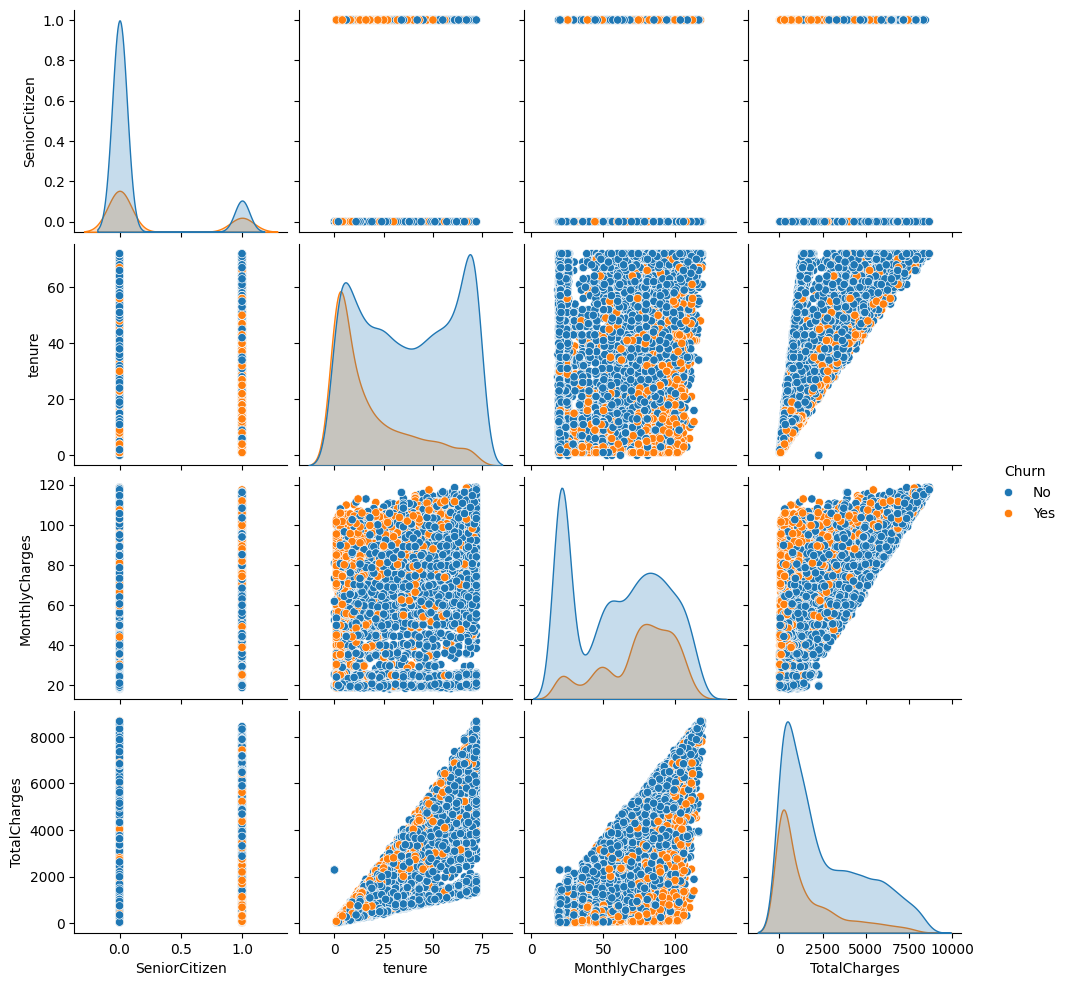

In [30]:
import seaborn as sns
sns.pairplot(df_num , hue = 'Churn')

In [31]:
df_non_num = df1.select_dtypes(exclude=['number'])
df_non_num.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


<Axes: xlabel='gender'>

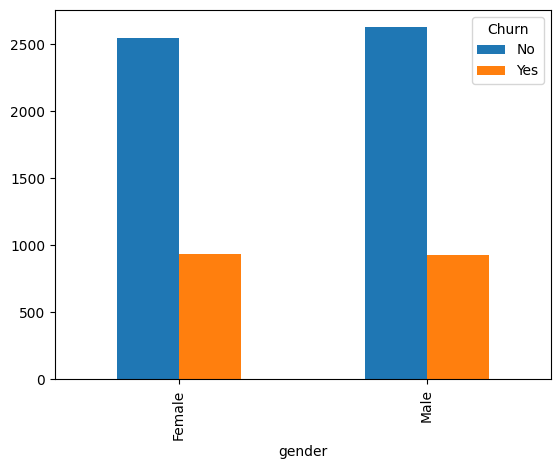

In [33]:
pd.crosstab(df_non_num['gender'], df_non_num['Churn']).plot.bar()

<Axes: xlabel='Dependents'>

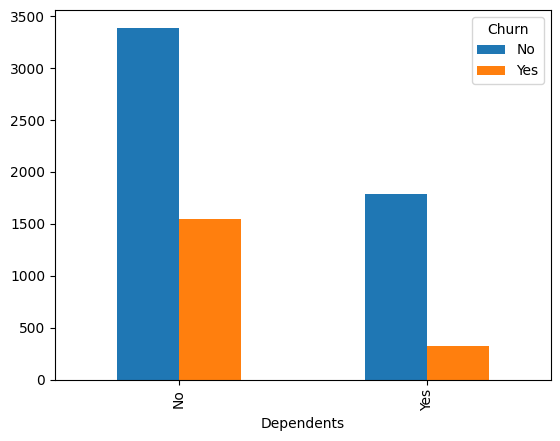

In [35]:
pd.crosstab(df_non_num['Dependents'], df_non_num['Churn']).plot.bar()

<Axes: xlabel='Partner'>

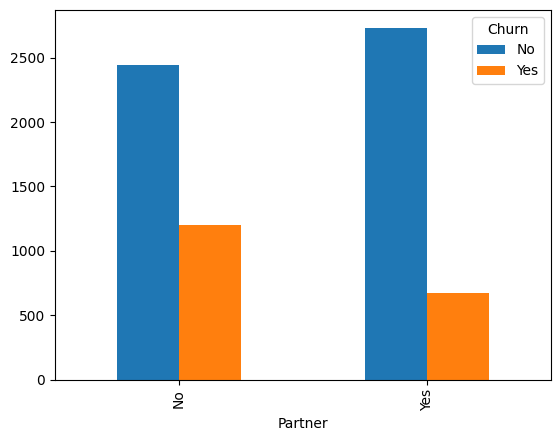

In [36]:
pd.crosstab(df_non_num['Partner'], df_non_num['Churn']).plot.bar()

In [38]:
df_non_num.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [69]:
for col in df_non_num.columns:
  print(col , df_non_num[col].unique())
  print('\n')

gender ['Female' 'Male']


Partner ['Yes' 'No']


Dependents ['No' 'Yes']


PhoneService ['No' 'Yes']


MultipleLines ['No phone service' 'No' 'Yes']


InternetService ['DSL' 'Fiber optic' 'No']


OnlineSecurity ['No' 'Yes' 'No internet service']


OnlineBackup ['Yes' 'No' 'No internet service']


DeviceProtection ['No' 'Yes' 'No internet service']


TechSupport ['No' 'Yes' 'No internet service']


StreamingTV ['No' 'Yes' 'No internet service']


StreamingMovies ['No' 'Yes' 'No internet service']


Contract ['Month-to-month' 'One year' 'Two year']


PaperlessBilling ['Yes' 'No']


PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn ['No' 'Yes']




In [70]:
def combine_categories(value):
  if value in ['No' , 'No internet service' , 'No phone service']:
    return 'No'
  else:
    return value

In [72]:
#to apply a user defined function on a single data column use apply()
#to apply a user defined function on a comple data frame use applymap()

df1 = df1.applymap(combine_categories)

In [73]:
df_non_num = df1.select_dtypes(exclude=['number'])
df_non_num.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [74]:
import matplotlib.pyplot as plt

i = 1
for col in df_non_num.columns[:-1]:
  d = pd.crosstab(df_non_num[col], df_non_num['Churn'])
  print(d)
  print('\n')

plt.show()

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


Churn            No   Yes
MultipleLines            
No             3053  1019
Yes            2121   850


Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


Churn             No   Yes
OnlineSecurity            
No              3450  1574
Yes             1724   295


Churn           No   Yes
OnlineBackup            
No            3268  1346
Yes           1906   523


Churn               No   Yes
DeviceProtection            
No                3297  1324
Yes               1877   545


Churn          No   Yes
TechSupport            
No           3440  155

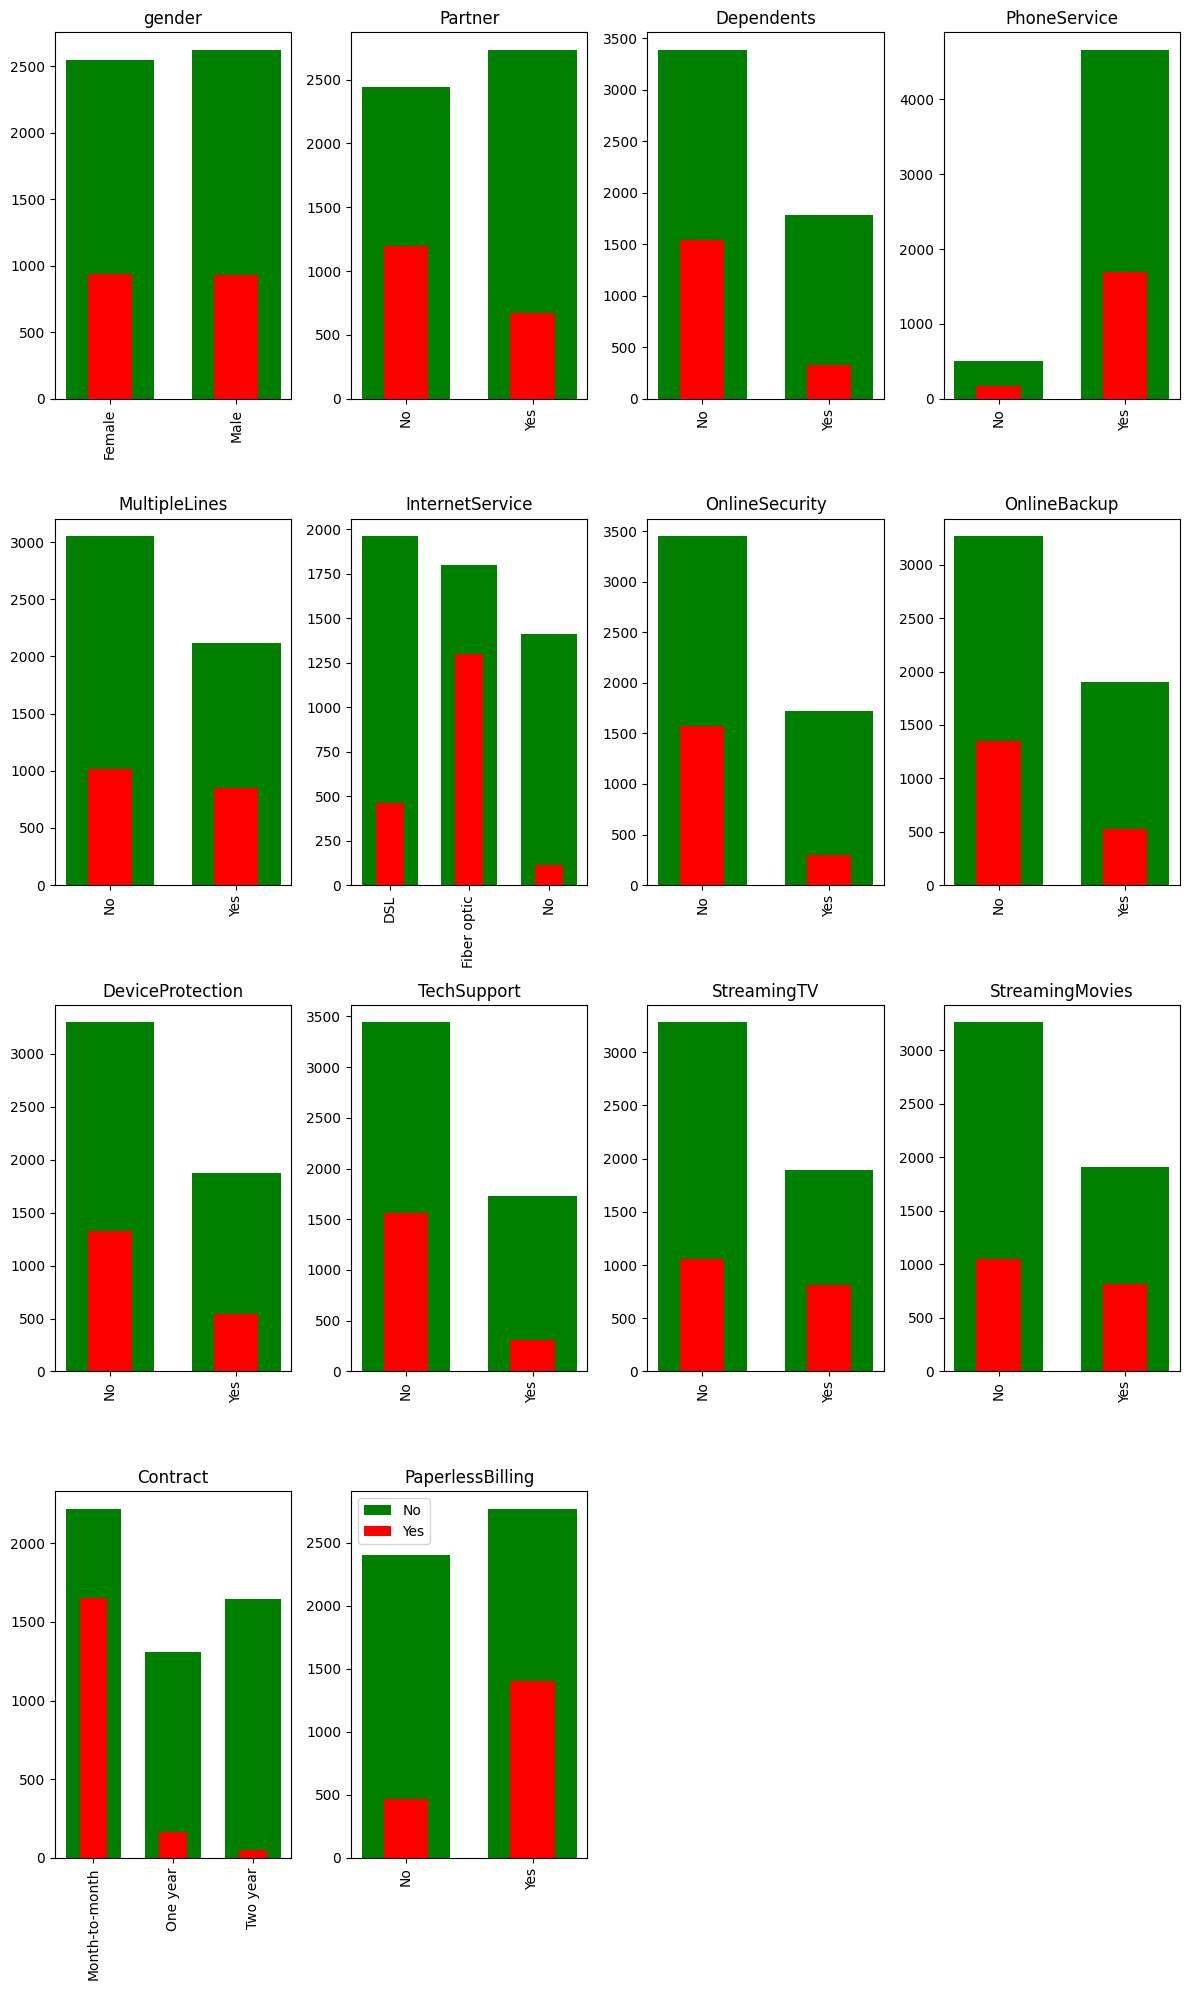

In [75]:
#create bar plot on subplots comparing how different categorical column is affecting churn
plt.figure(figsize = (12,20))

i = 1
for col in df_non_num.columns[:-1]:
  #print(pd.crosstab(df_non_num[col], df_non_num['Churn']))
  #print('\n')
  plt.subplot(4,4,i)
  d = pd.crosstab(df_non_num[col], df_non_num['Churn'])
  plt.bar(d.index, d.iloc[:,0] , width = 0.7 , label = "No" , color = "green")
  plt.bar(d.index, d.iloc[:,1] , width = 0.35 , label = "Yes" , color = "red")
  plt.xticks(rotation = 90)
  plt.title(col)
  i = i + 1
  if i == 15:
    break

plt.legend()
plt.tight_layout()
plt.show()

In [76]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [79]:
#Perform label encoding on all categorical columns avoiding internet services , PaymentMethod as they are nominal data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.columns:
  if col in ['InternetService' , 'PaymentMethod']:
    continue
  elif df1[col].dtype == 'object':
    df1[col] = le.fit_transform(df1[col])
  else:
    pass

In [80]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [82]:
#perform one hot encoding for InternetService & Paymentmethod
df2 = pd.get_dummies(df1 , columns = ['InternetService','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,True,False,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,True,False,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,False,True,False,False,False,True,False


In [89]:
X = df2.drop('Churn' , axis = 'columns')
y = df2['Churn']

In [90]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [91]:
#Perform undersampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=3)
X_rus, y_rus = rus.fit_resample(X, y)

In [92]:
y_rus.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [96]:
#Perform Oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3)
X_ros, y_ros = ros.fit_resample(X, y)

In [97]:
y_ros.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [98]:
#Build a classification model to predict Churn using KNN algorithm


#split the data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=3)

#perform min-max scaling to scale down all data points in the range og 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

#train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_trainScaled, y_train)


#make predictions
y_trainpred = knn.predict(X_trainScaled)
y_testpred = knn.predict(X_testScaled)


#evaluate model performance
from sklearn.metrics import accuracy_score
print('Train Accuracy: ', accuracy_score(y_train, y_trainpred))
print('Test Accuracy: ', accuracy_score(y_test, y_testpred))

Train Accuracy:  0.8335346702101957
Test Accuracy:  0.7531400966183575


* the model is expected to predict churn or non-churn
* calculate accuarcy of model while predicting churn and while predicting non-churn

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_testpred))

[[697 348]
 [163 862]]


In [100]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1045
           1       0.71      0.84      0.77      1025

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



* Prediction

In [107]:
print(knn.predict(scaler.transform([X_test.values[8]])))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [108]:
#Probability of Non-Churn and Churn

print(knn.predict_proba(scaler.transform([X_test.values[8]])))

[[0.4 0.6]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
